In [3]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datagovindia import DataGovIndia
from fuzzywuzzy import process

In [4]:
# To Sync The Data From Source
MY_API_KEY = "579b464db66ec23bdd000001973d3e2bd75e45f07473b608e00799e8"

datagovin = DataGovIndia(MY_API_KEY) # Specify API key if not set as an environment variable
# datagovin.sync_metadata(7000 , 20)

In [5]:
## IMPORTANT FUNCTIONS ##

# searching available dataframes by name
def search_datagov(search_term , columns = ['title', 'description']):
    search_data = datagovin.search(search_term)
    # search_data = datagovin.search(search_term , search_fields=columns)

    if len(search_data) > 0:

        search_titles = search_data['title']
        search_id = search_data['resource_id']

        # for res in zip(search_id , search_titles):
        #     print(res)

        return zip(search_id , search_titles)
    
    return "Not Found"

# getting a resource by ID, onvert it to csv as well
def datagov_data(r_id , save=False , filename = ''):
    data = datagovin.get_data(r_id)
    if save:
        data.to_csv(filename, index=False)

    print(data.columns)
    print(data.sample(5))
    return data

# show the non-intersecting columns of the 2 dfs, little outdated
def show_unmerged(df1 , df2 , col):
    # Perform an outer merge
    merged_outer = pd.merge(df1, df2, how='outer', on=col, indicator=True)

    # Filter out rows that were included in the inner merge
    deleted_rows = merged_outer[merged_outer['_merge'] == 'left_only']

    # Print the deleted rows
    print(deleted_rows)


# get population of the state (Census 2011)
def get_state_pop(state):
    india_df = pd.read_excel("2011-IndiaState.xlsx")
    
    # print(india_df.columns)

    states_total = india_df[['Name','TRU','TOT_P']][india_df['TRU'] == 'Total']
    states_total = states_total[['Name' , 'TOT_P']]
    
    best_match = process.extract(state, states_total['Name'], limit=1)[0][0]
    print("Matched Value:" , best_match)
    
    return states_total[states_total['Name'] == best_match]['TOT_P'].astype('int32').tolist()[0]


# rename all states so they are identical and ready for merging
def standardize_states(state_col):
    s_states = []

    # Iterate over each state name in the 'state' column
    for state in state_col:
        # Apply the standardize_states function to the state name and append the result to the list
        state_name = get_state_name(state)
        s_states.append(state_name)

    return s_states


# helper for standardize_states
def get_state_name(state):
    india_df = pd.read_csv("C:\\Users\\Ojasva Saxena\\Desktop\\Personal\\Maps\\Lucknow\\Unorganised_Workers_e-Shram_byStateFeb24.csv") # using these values of states as base
    
    # print(india_df.columns)

    states_total = india_df[['state_ut']]

    states_total['state_ut'] = states_total['state_ut'].str.upper()
 
    best_match = process.extract(state.upper(), states_total['state_ut'], limit=1)[0][0]
    print("Matched Value:" , best_match)
    
    return best_match


In [ ]:
# SEARCH DATASETS

result = search_datagov("NFHS")

for x in result:
    print(x)

In [12]:
'''
('9bab642e-e2ad-4f9d-99e7-8e56183bb126', 'State/UT-wise Details of the Percentages of Women between Age 15-49 Years who have Mobile Phone as per the Fifth Round of National Family Health Survey (NFHS-5) during 2019-21')
'''
title_csv = "women_mobiles_NFHS5.csv"
data_mobiles = datagov_data("9bab642e-e2ad-4f9d-99e7-8e56183bb126" , True , title_csv)

data_mobiles = pd.read_csv(title_csv)

Index(['states_uts', 'women_age_15_49_years_who_have_a_mobile_phone_that_they_themselves_use____'], dtype='object')
      states_uts  \
6   Chhattisgarh   
27        Punjab   
19   Maharashtra   
26    Puducherry   
3          Assam   

    women_age_15_49_years_who_have_a_mobile_phone_that_they_themselves_use____  
6                                                40.7                           
27                                               61.2                           
19                                               54.8                           
26                                               82.8                           
3                                                57.2                           


In [14]:
# DATA CLEANING FOR GOV DATA

df = data_mobiles.copy()

df.columns = ['state' , 'women_mobiles']

df['women_mobiles'] = df['women_mobiles'].astype('float')

df['state'] = standardize_states(df['state'])

Matched Value: ANDAMAN AND NICOBAR ISLANDS
Matched Value: ANDHRA PRADESH
Matched Value: ARUNACHAL PRADESH
Matched Value: ASSAM
Matched Value: BIHAR
Matched Value: CHANDIGARH
Matched Value: CHHATTISGARH
Matched Value: DADRA AND NAGAR HAVELI AND DAMAN AND DIU
Matched Value: GOA
Matched Value: GUJARAT
Matched Value: HARYANA
Matched Value: HIMACHAL PRADESH
Matched Value: JAMMU AND KASHMIR
Matched Value: JHARKHAND
Matched Value: KARNATAKA
Matched Value: KERALA
Matched Value: LADAKH
Matched Value: LAKSHADWEEP
Matched Value: MADHYA PRADESH
Matched Value: MAHARASHTRA
Matched Value: MANIPUR
Matched Value: MEGHALAYA
Matched Value: MIZORAM
Matched Value: NAGALAND
Matched Value: DELHI
Matched Value: ODISHA
Matched Value: PUDUCHERRY
Matched Value: PUNJAB
Matched Value: RAJASTHAN
Matched Value: SIKKIM
Matched Value: TAMIL NADU
Matched Value: TELANGANA
Matched Value: TRIPURA
Matched Value: UTTAR PRADESH
Matched Value: UTTARAKHAND
Matched Value: WEST BENGAL
Matched Value: CHANDIGARH


C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_55064\535679929.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_total['state_ut'] = states_total['state_ut'].str.upper()
C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_55064\535679929.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_total['state_ut'] = states_total['state_ut'].str.upper()
C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_55064\535679929.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [15]:
# Readying Geodata File

# shp_path =  "C:\\Users\\Ojasva Saxena\\Desktop\\Personal\\Maps\\maps-master\\maps-master\\Survey-of-India-Index-Maps\\stateBoundary\\stateBoundary.shp"
shp_path = "C:\\Users\\Ojasva Saxena\\Desktop\\Personal\\Maps\\maps-master\\maps-master\\States\\Admin2.shp" # with Ladakh
map_gdf = gpd.read_file(shp_path)

map_gdf.columns = ['state' , 'geometry']
map_gdf['state'] = standardize_states(map_gdf['state'])

Matched Value: ARUNACHAL PRADESH
Matched Value: ASSAM
Matched Value: CHANDIGARH
Matched Value: KARNATAKA
Matched Value: MANIPUR
Matched Value: MEGHALAYA
Matched Value: MIZORAM
Matched Value: NAGALAND
Matched Value: PUNJAB
Matched Value: RAJASTHAN
Matched Value: SIKKIM
Matched Value: TRIPURA
Matched Value: UTTARAKHAND
Matched Value: TELANGANA
Matched Value: BIHAR
Matched Value: KERALA
Matched Value: MADHYA PRADESH
Matched Value: ANDAMAN AND NICOBAR ISLANDS
Matched Value: GUJARAT
Matched Value: LAKSHADWEEP
Matched Value: ODISHA
Matched Value: DADRA AND NAGAR HAVELI AND DAMAN AND DIU
Matched Value: JAMMU AND KASHMIR
Matched Value: CHHATTISGARH
Matched Value: DELHI
Matched Value: GOA
Matched Value: HARYANA
Matched Value: HIMACHAL PRADESH
Matched Value: JHARKHAND
Matched Value: TAMIL NADU
Matched Value: UTTAR PRADESH
Matched Value: WEST BENGAL
Matched Value: ANDHRA PRADESH
Matched Value: PUDUCHERRY
Matched Value: MAHARASHTRA
Matched Value: LADAKH


C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_55064\535679929.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_total['state_ut'] = states_total['state_ut'].str.upper()
C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_55064\535679929.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_total['state_ut'] = states_total['state_ut'].str.upper()
C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_55064\535679929.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [16]:
# MERGE MAP TO GOVT DF

map_data = pd.merge(map_gdf , df , how='left' , on="state")

<Figure size 640x480 with 0 Axes>

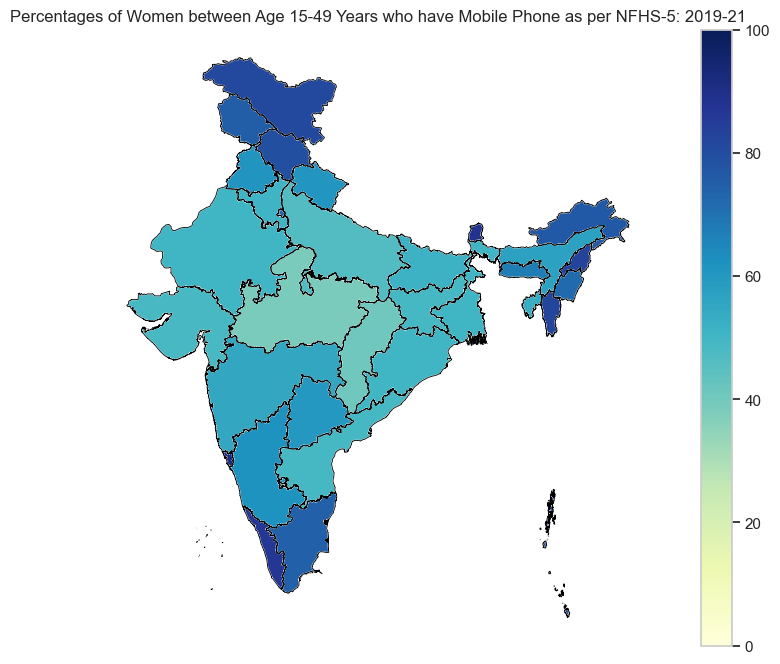

In [33]:
# PLOT MAP

'''
COLOURS:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 
'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd',
'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2',
'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 
'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn',
'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 
'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot',
'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis',
'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 
'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 
'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 
'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 
'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 
'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 
'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 
'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 
'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r',
'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
'''

value_column = 'women_mobiles'

sns.set(style="whitegrid")  # Set seaborn style
sns.despine()  # Remove spines

# Create a figure and axis object
ax = map_data.boundary.plot(edgecolor="black" , linewidth=0.6 , figsize=(12,8))
map_data.plot(ax=ax, column=value_column , legend="True" , cmap='YlGnBu', vmin=0 , vmax=100) # Wistia

# for idx, row in map_data.iterrows():
# 	if row['change'] > 0:
# 	    change = "+" + str(round(row['change'] , 1))
# 	else:
# 	    change = "-" + str(round(row['change'] , 1))

# 	centroid = row.geometry.centroid
# 	ax.annotate(change, xy=(centroid.x, centroid.y), xytext=(0,0), textcoords="offset points", fontsize=9, color='darkred',fontfamily='serif')


# Set plot title and labels
ax.set_title("Percentages of Women between Age 15-49 Years who have Mobile Phone as per NFHS-5: 2019-21")
plt.axis("off")

# Save the plot
plt.savefig('Women_Mobile_byState_NFHS5.png' , dpi=300 , bbox_inches='tight')
plt.show()